In [13]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt

happy = pd.read_csv('2019.csv')
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [18]:
happy = happy.dropna()
print(happy.shape)

happy.head()

(156, 9)


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [48]:
happy['Country or region'] = happy['Country or region'].astype('object')
happy['Healthy life expectancy'] = happy['Healthy life expectancy'].astype('float64')
happy['GDP per capita'] = happy['GDP per capita'].astype('float64')
happy['Overall rank'] = happy['Overall rank'].astype('float64')
happy['Social support'] = happy['Social support'].astype('float64')
happy['Generosity'] = happy['Generosity'].astype('float64')
happy.head(10)

happy1 = netfl[[x for x in happy.columns if 'Overall rank' in x] + ['Healthy life expectancy']]\
    .groupby('Overall rank').sum()

happy1.head(10)




,Healthy life expectancy
Overall rank,
1,0.986
2,0.996
3,1.028
4,1.026
5,0.999
6,1.052
7,1.009
8,1.026
9,1.039


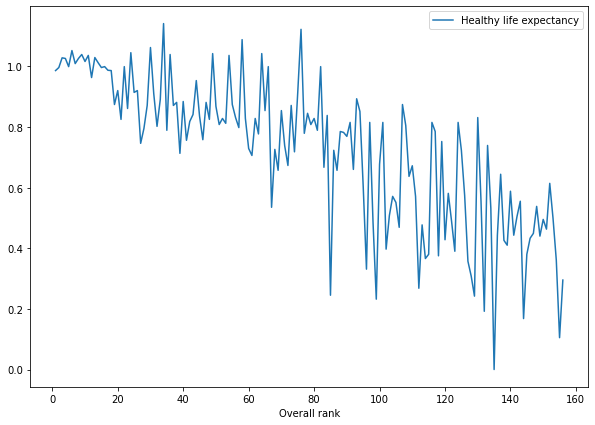

In [44]:

happy1.plot()

из представленного графика можно сделать вывод что продолжительность жизни связанна с общим рейтингом счастья не линейна и высокая продолжительность жизни наблюдается у стран с ретингом даже ниже 70.


In [45]:

happy2 = netfl[[x for x in happy.columns if 'Overall rank' in x] + ['GDP per capita']]\
    .groupby('Overall rank').sum()
happy2.head(10)

,GDP per capita
Overall rank,
1,1.340
2,1.383
3,1.488
4,1.380
5,1.396
6,1.452
7,1.387
8,1.303
9,1.365


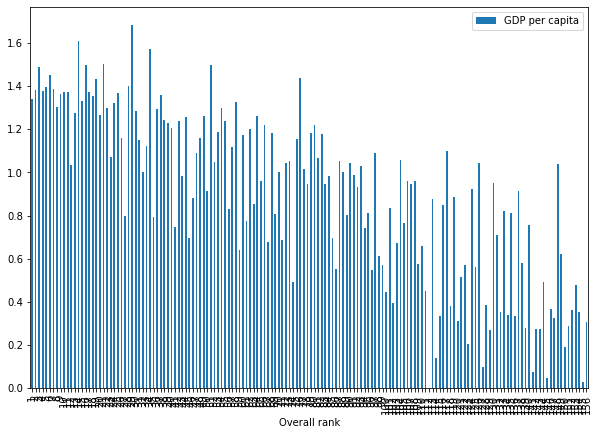

In [47]:
happy2.plot(kind='bar')

из представленного графика можно сделать вывод что 
ВВП на душу населения связанна с общим рейтингом счастья не линейна, но в среднем, чем ниже рейтинг страны, тем ниже ввп на дущу населения

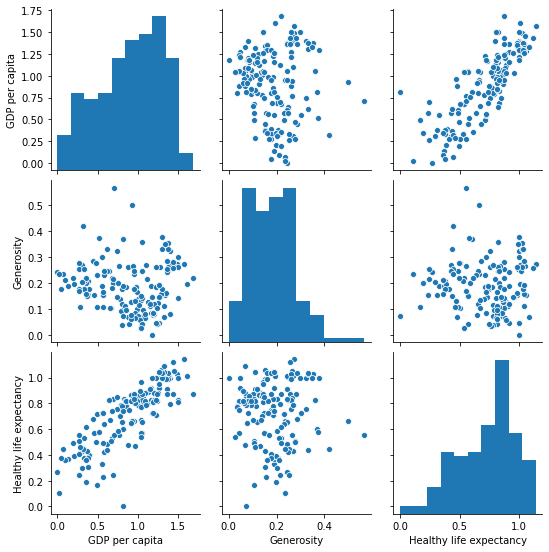

In [51]:
import seaborn as sns

sns = sns.pairplot(
    happy[[ 'GDP per capita', 'Generosity', 'Healthy life expectancy']])
sns


In [53]:

happy3 = netfl[[x for x in happy.columns if 'Overall rank' in x] + ['Generosity']]\
    .groupby('Overall rank').sum()

happy3.head(10)

,Generosity
Overall rank,
1,0.153
2,0.252
3,0.271
4,0.354
5,0.322
6,0.263
7,0.267
8,0.330
9,0.285


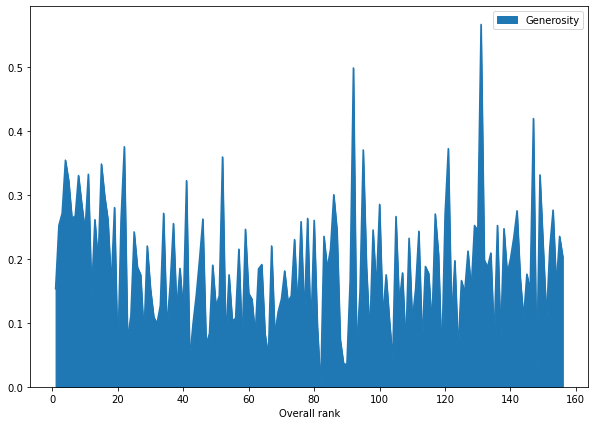

In [54]:
happy3[list(filter(lambda x: x != 'Overall rank', happy3.columns))]\
    .plot(kind='area', rot=0, stacked=True)